In [36]:
import pandas as pd
import numpy as np 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split,KFold,GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import datasets 
from sklearn.datasets import load_boston

import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
boston = datasets.load_boston()
features = pd.DataFrame(boston.data,columns=boston.feature_names)  
features['PRICES']= boston.target
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICES
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [38]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICES   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [39]:
#Minimum price of the data
mini_features = np.min(boston.target)
#Maximum price of the data
maxi_features = np.max(boston.target)
# Mean price of the data
mean_features = np.mean(boston.target)
# Median price of the data
median_features = np.median(boston.target)
#Standard deviation of prices of the data
std_features= np.std(boston.target)
# There are other statistics you can calculate too like quartiles
first_quartile = np.percentile(features, 25)
third_quartile = np.percentile(features, 75)
inter_quartile = third_quartile - first_quartile
#Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print("---------------------------------------\n")
print ("Minimum price: ${:,.2f}".format(mini_features))
print ("Maximum price: ${:,.2f}".format(maxi_features))
print ("Mean price: ${:,.2f}".format(mean_features))
print ("Median price ${:,.2f}".format(median_features))
print ("Standard deviation of prices: ${:,.2f}".format(std_features))
print ("First quartile of prices: ${:,.2f}".format(first_quartile))
print ("Second quartile of prices: ${:,.2f}".format(third_quartile))
print ("Interquartile (IQR) of prices: ${:,.2f}".format(inter_quartile))

Statistics for Boston housing dataset:

---------------------------------------

Minimum price: $5.00
Maximum price: $50.00
Mean price: $22.53
Median price $21.20
Standard deviation of prices: $9.19
First quartile of prices: $1.37
Second quartile of prices: $24.00
Interquartile (IQR) of prices: $22.63


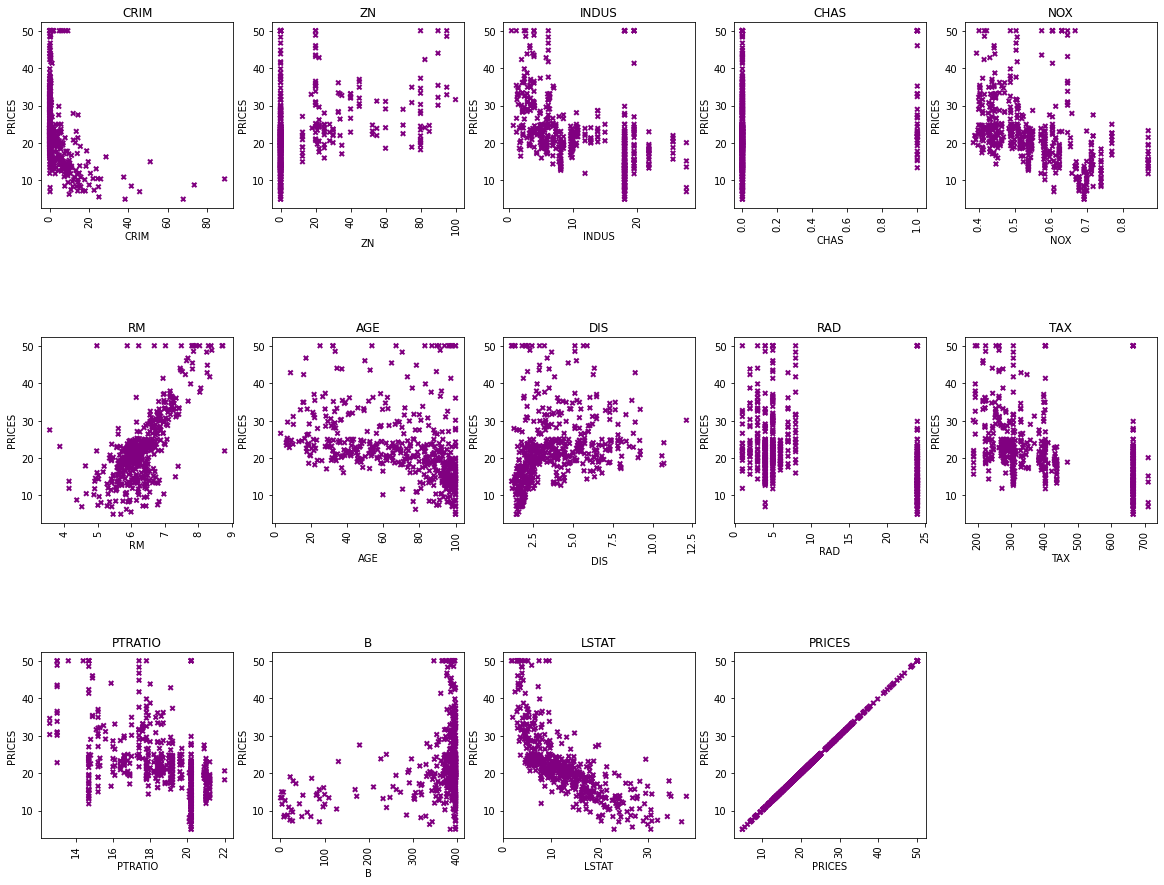

In [40]:
# Dataset Visualization 
from math import ceil
fig = plt.figure(figsize=(20,15))
cols = 5
rows = ceil(float(features.shape[1]) / cols)
for i, column in enumerate(features.columns):
    axs = fig.add_subplot(rows, cols, i + 1)
    axs.set_title(column)
    features.plot(kind='scatter', x=column, y='PRICES', ax = axs, color= 'purple',
                  marker='x', linestyle='dashed', linewidth=2)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

<AxesSubplot:>

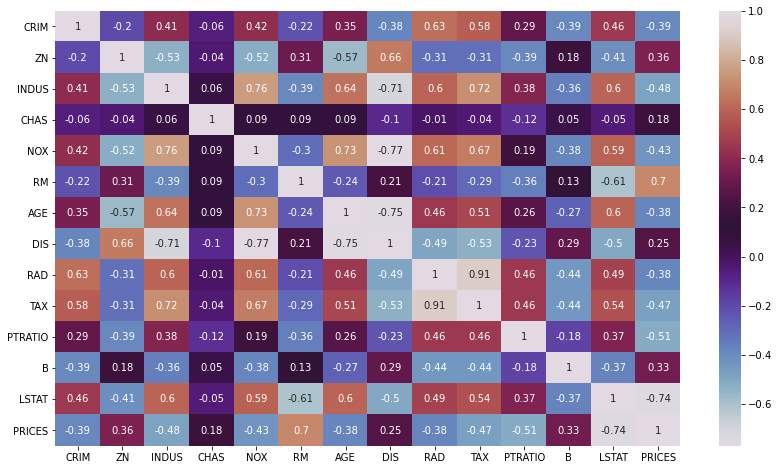

In [41]:
# Plot the correlation heatmap
plt.figure(figsize=(14, 8))
corr_matrix = features.corr().round(2)
sns.heatmap(data=corr_matrix,cmap='twilight',annot=True)

Observe that *RAD* and *TAX* are *highly correlated* with each other (*Correlation score: 0.92*) while there are a couple of features which are somewhat correlated with one another with a correlation score of around 0.70

Text(0, 0.5, 'PRICES')

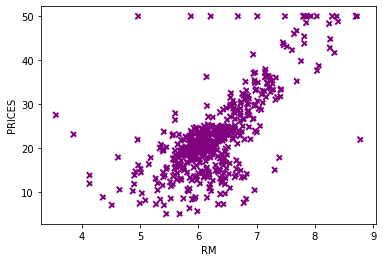

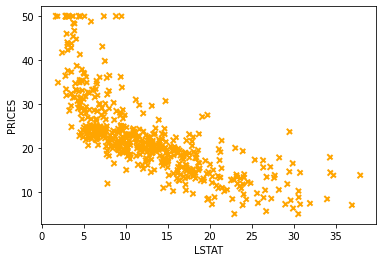

In [46]:
#Scatter plot to observe the correlations between the features that are highly correlated with PRICES
target_var = features['PRICES']
plot1 = plt.figure(1)

target_var = features['PRICES']

# RM Plot for PRICES
plot1 = plt.figure(1)
plt.scatter(features['RM'],target_var,  color= 'purple',
                  marker='x', linestyle='dashed', linewidth=2)
plt.xlabel('RM')
plt.ylabel('PRICES')

# Scatter Plot of LSTAT Plot for PRICES
plot2 = plt.figure(2)
plt.scatter(features['LSTAT'],target_var, color= 'orange',
                  marker='x', linestyle='dashed', linewidth=2)
plt.xlabel('LSTAT')
plt.ylabel('PRICES')

Create our Random Forest Model🔥

In [42]:
# A function to split our training data into a training set to train our  model 
#and a validations set, which will be used to validate our model.
X = features.drop(columns = 'PRICES')
y = features['PRICES']

In [43]:
#Splitting our training data further — Training data to train our Random Forest Model 
#on and Validation data to validate the performance of our Model.
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state= 343)
X_scaler = StandardScaler()
X_train = X_scaler.fit_transform(X_train)
X_test = X_scaler.transform(X_test)

y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train[:, None])[:,0]
y_test = y_scaler.transform(y_test[:, None])[:,0]

#Let's first visualize the tree on the data without doing any preprocessing
clf = RandomForestRegressor(n_jobs=-1)
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [44]:
#Performing RandomizedSearchCV to tune the hyper paramaters, then use the best estimator
n_estimators = [int(x) for x in np.arange(start = 10, stop = 2000, step = 10)]
max_features = [0.5,'auto', 'sqrt','log2']
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}# First create the base model to tune
m = RandomForestRegressor()
# Fit the random search model
m_random = RandomizedSearchCV(estimator = m, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
m_random.fit(X_train, y_train)
m_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.0min finished


{'n_estimators': 790,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'bootstrap': False}

In [45]:
from sklearn import metrics
y_pred = clf.predict(X_test)
print('Test Accuracy:', format(metrics.r2_score(y_test, y_pred) * 100, '.2f'), '%')
print('Mean Squared Error:', format(metrics.mean_squared_error(y_test, y_pred), '.5f'))

# Calculating mean Error Value
X = features.iloc[:,0:-1]
y = features.iloc[:,-1]
cv = KFold(n_splits=10, shuffle = True, random_state=12)

reg = RandomForestRegressor(n_estimators = 10, random_state = 42)
for train_fold, valid_fold in cv.split(X):
    train = X.loc[train_fold] # Extract train data with cv indices
    valid = X.loc[valid_fold] # Extract valid data with cv indices
    
    train_y = y.loc[train_fold]
    valid_y = y.loc[valid_fold]
    
    model = reg.fit(X = train, y = train_y)
    model_pred = model.predict(X = valid)
    errors = abs(model_pred - valid_y)
# Print out the mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2))

Test Accuracy: 88.52 %
Mean Squared Error: 0.19224
Mean Absolute Error: 2.44


In [ ]:
🤷‍🎶